In [169]:
pip install mne


Note: you may need to restart the kernel to use updated packages.


pip install mne


In [2]:
import os
import numpy as np
import mne

The mne.datasets.sample.data_path function will automatically download the dataset if it isn’t found in one of the expected locations, then return the directory path to the dataset

In [33]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\ashish\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


### By default, read_raw_fif displays some information about the file it’s loading; for example, here it tells us that there are four “projection items” in the file along with the recorded data; those are SSP projectors calculated to remove environmental noise from the MEG signals, plus a projector to mean-reference the EEG channels;

In addition to the information displayed during loading, you can get a glimpse of the basic details of a Raw object by printing it; even more is available by printing its info attribute (a dictionary-like object that is preserved across Raw, Epochs, and Evoked objects)

The info data structure keeps track of channel locations, applied filters, projectors,

In [4]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


 Notice especially the chs entry, showing that MNE-Python detects different sensor types and handles each appropriately

Raw objects also have several built-in plotting methods; here we show the power spectral density (PSD) for each sensor type with plot_psd, as well as a plot of the raw sensor traces with plot. In the PSD plot, we’ll only plot frequencies below 50 Hz (since our data are low-pass filtered at 40 Hz). In interactive Python sessions, plot is interactive and allows scrolling, scaling, bad channel marking, annotation, projector toggling

Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


C:\Users\ashish\AppData\Local\Temp\ipykernel_16588\707285903.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd(fmax=50).plot()
c:\Users\ashish\anaconda3\envs\MyENV\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


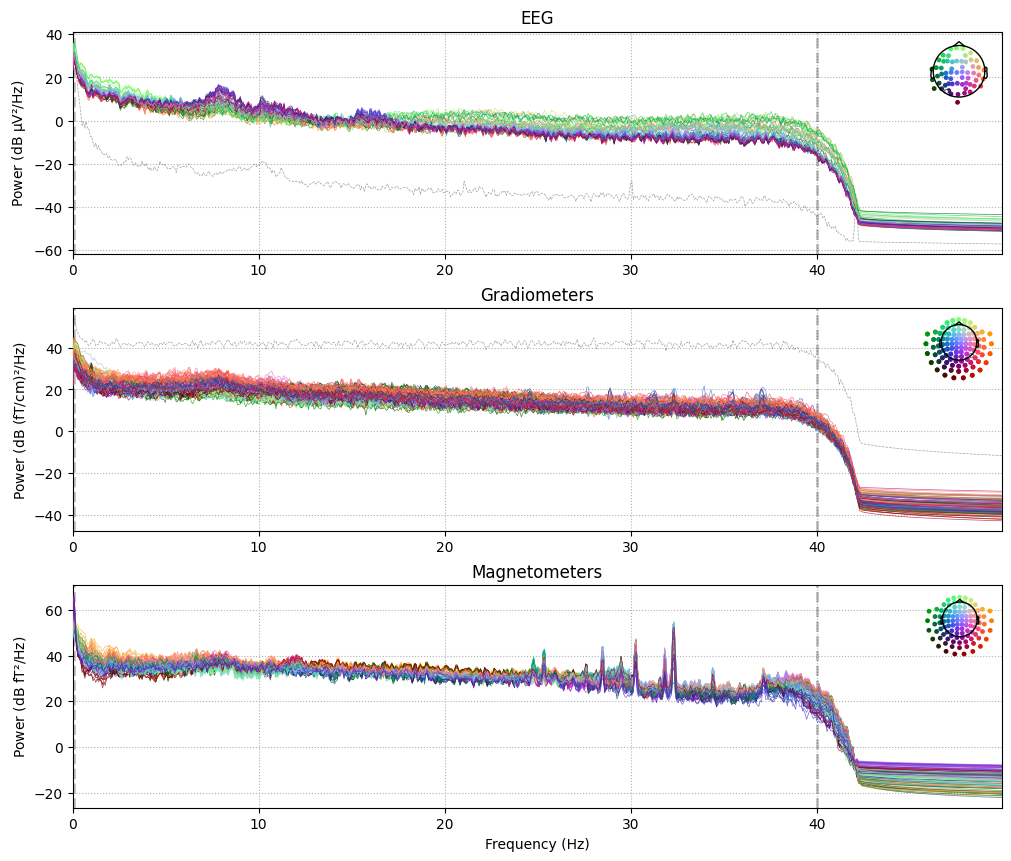

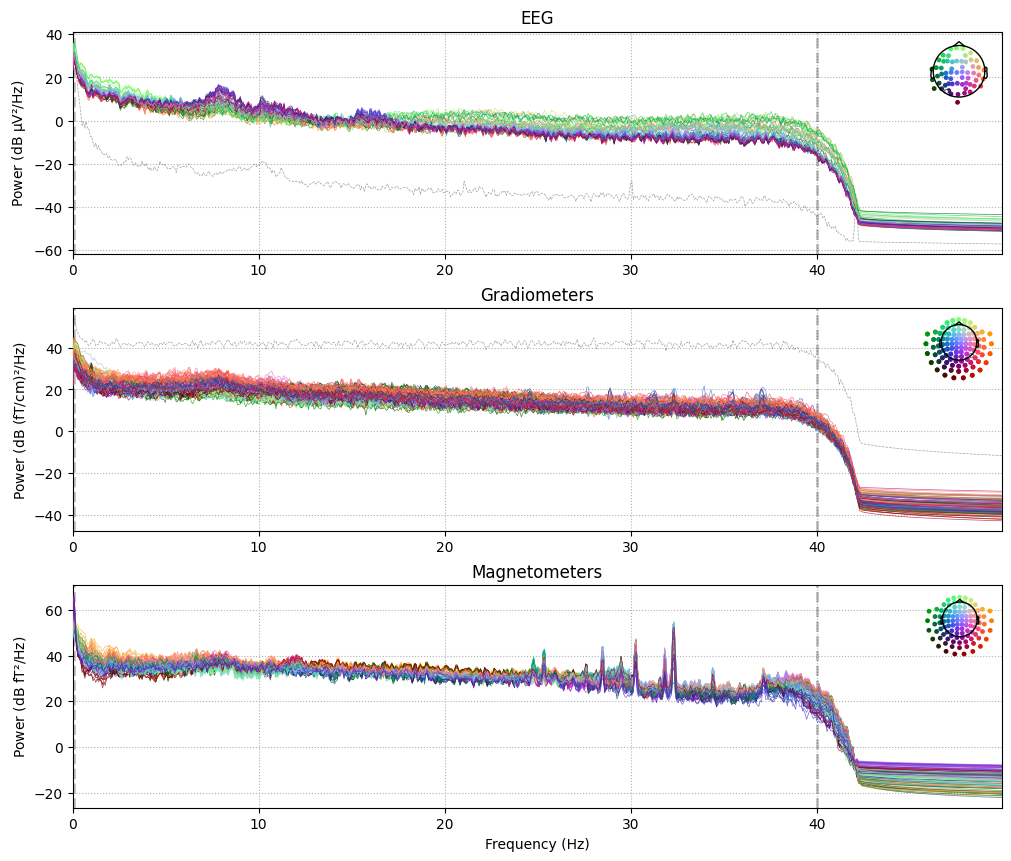

In [5]:
raw.compute_psd(fmax=50).plot()

# signal power content vs frequency graph

A Power Spectral Density (PSD) is the measure of signal's power content versus frequency. A PSD is typically used to characterize broadband random signals. The amplitude of the PSD is normalized by the spectral resolution employed to digitize the signal.

# Preprocessing

MNE-Python supports a variety of preprocessing approaches and techniques (maxwell filtering, signal-space projection, independent components analysis, filtering, downsampling, etc); 



# ICA
Independent Component Analysis (ICA) is a statistical and computational technique used in machine learning to separate a multivariate signal into its independent non-Gaussian components. The goal of ICA is to find a linear transformation of the data such that the transformed data is as close to being statistically independent as possible.


https://www.geeksforgeeks.org/ml-independent-component-analysis/


# Artifact
Artifact on EEG is anything that does not arise from the brain itself.

https://www.learningeeg.com/artifacts

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.9s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


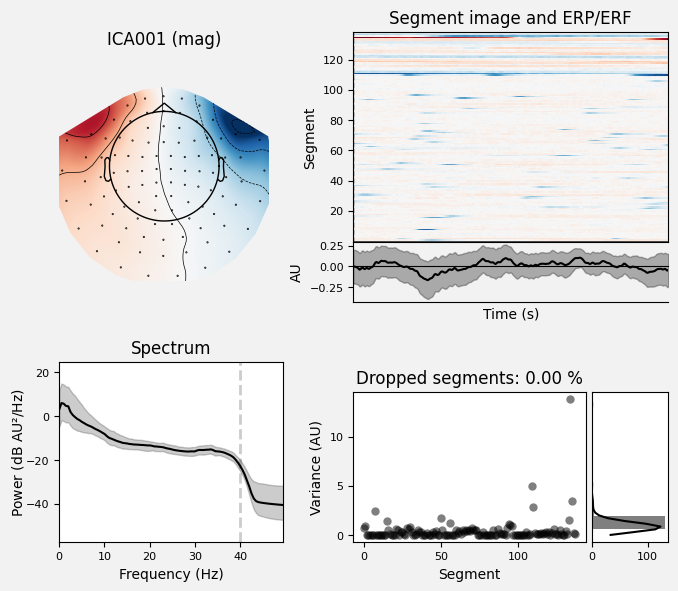

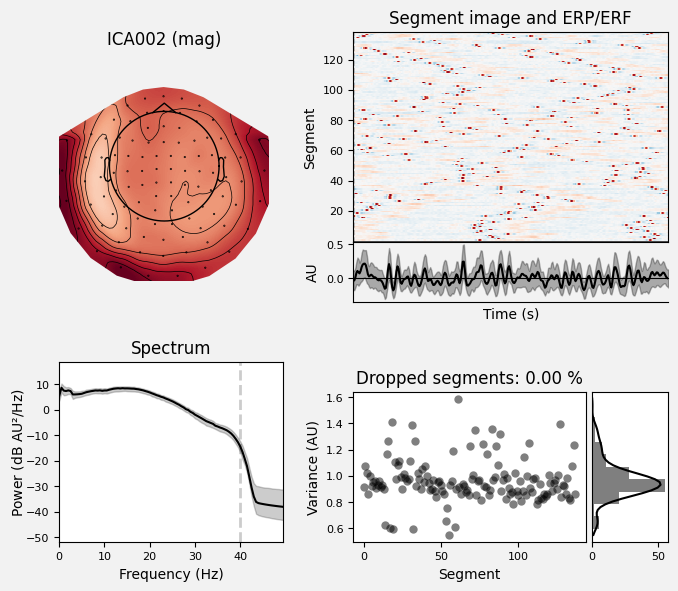

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [7]:

# set up and fit the ICA
#from sklearn.decomposition import PCA, FastICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Once we're confident about which component(s) we want to remove,we pass as the exclude parameter and then apply the ICA to the raw signals.The apply requires the raw data to be loaded into memory(by default it's only read from disk as-needed),so we'll use load_data first.We'll also make a copy of the *Raw* object so we can compare the signal before and after removal side-by-side:

In [8]:
orig_raw=raw.copy()
raw.load_data()
ica.apply(raw)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,150.15 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


In [9]:
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]

In [10]:
type(chan_idxs)

list

In [11]:
chan_idxs[1]

5

In [12]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [13]:
raw.ch_names.index("MEG 0111")

2

In [14]:
print(raw.ch_names[2])

MEG 0111


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components
Using matplotlib as 2D backend.


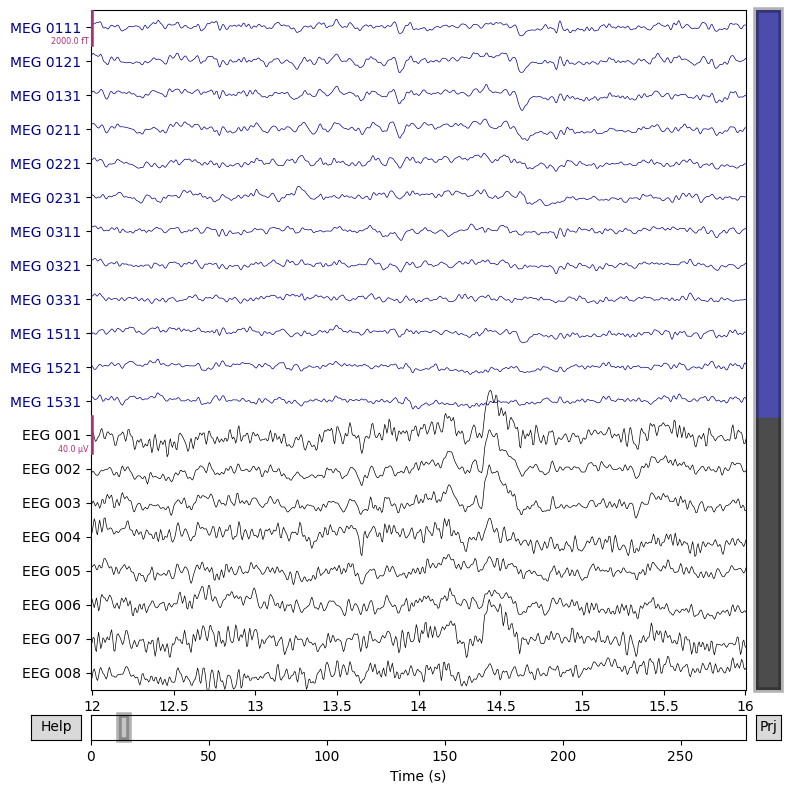

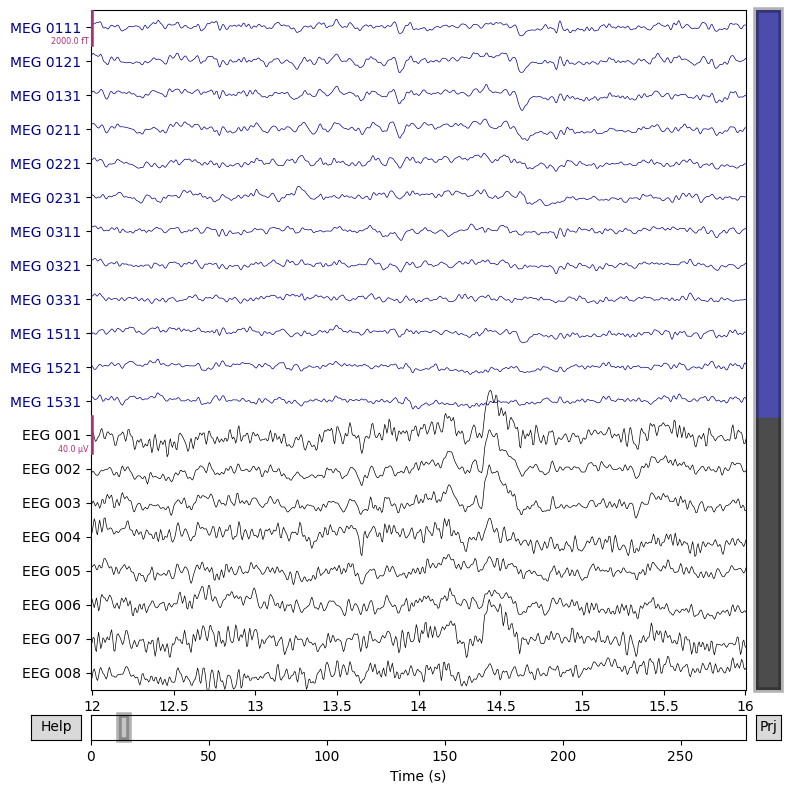

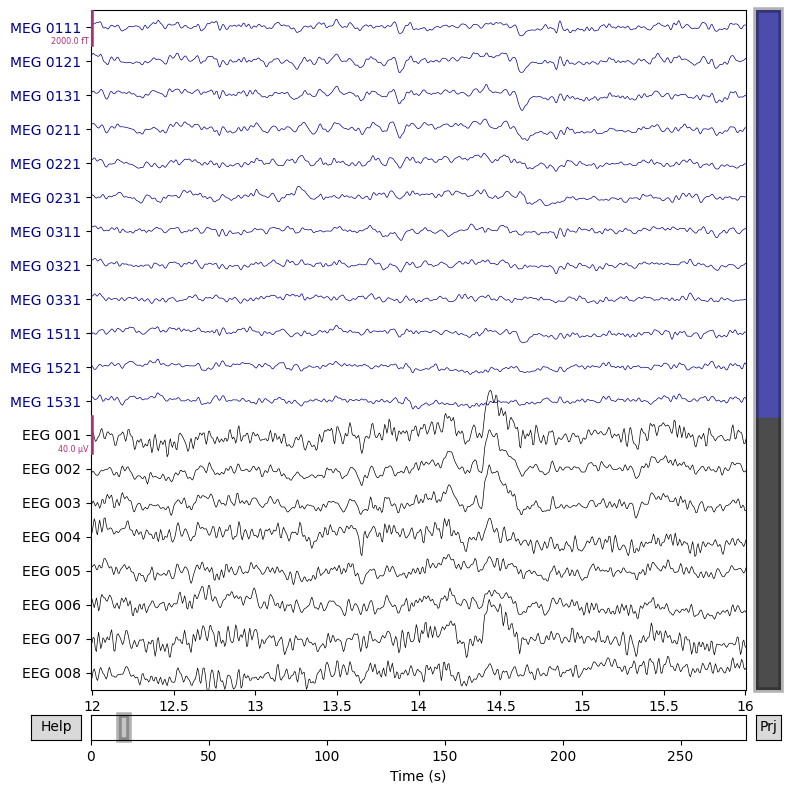

In [15]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

# Detecting experimental events

The sample dataset includes several “STIM” channels that recorded electrical signals sent from the stimulus delivery computer (as brief DC shifts / squarewave pulses). These pulses (often called “triggers”) are used in this dataset to mark experimental events: stimulus onset, stimulus type, and participant response (button press). 

In [19]:
events=mne.find_events(raw,stim_channel='STI 014')
print(events[:5]) # show the first 5

319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


The resulting events array is an ordinary 3-column NumPy array, with sample number in the first column and integer event ID in the last column; the middle column is usually ignored.

we can provide an event dictionary that maps the integer IDs to experimental conditions or events. In this dataset, the mapping looks like this:

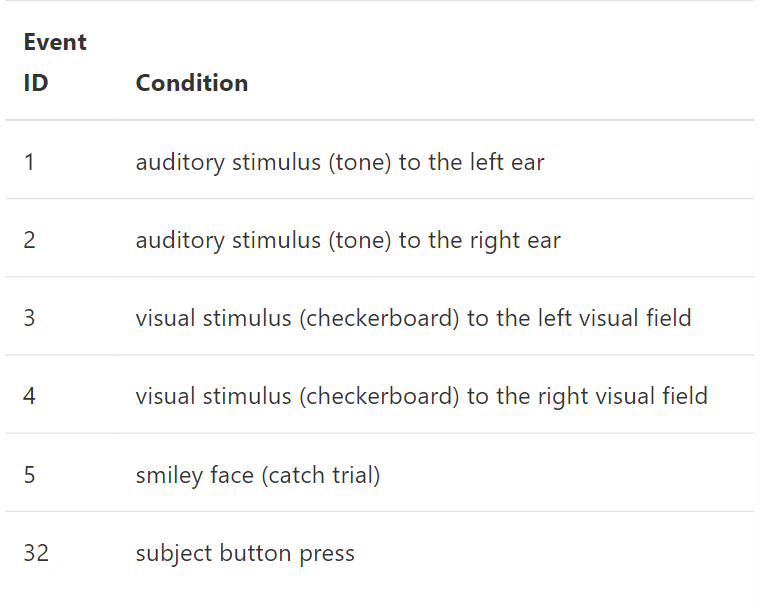

In [20]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

In [21]:
events

array([[ 6994,     0,     2],
       [ 7086,     0,     3],
       [ 7192,     0,     1],
       [ 7304,     0,     4],
       [ 7413,     0,     2],
       [ 7506,     0,     3],
       [ 7612,     0,     1],
       [ 7709,     0,     4],
       [ 7810,     0,     2],
       [ 7916,     0,     3],
       [ 8025,     0,     1],
       [ 8129,     0,     4],
       [ 8233,     0,     2],
       [ 8331,     0,     3],
       [ 8428,     0,     1],
       [ 8522,     0,     5],
       [ 8633,     0,     2],
       [ 8662,     0,    32],
       [ 8739,     0,     3],
       [ 8857,     0,     1],
       [ 8962,     0,     4],
       [ 9052,     0,     2],
       [ 9144,     0,     3],
       [ 9251,     0,     1],
       [ 9365,     0,     4],
       [ 9477,     0,     2],
       [ 9581,     0,     3],
       [ 9677,     0,     1],
       [ 9782,     0,     4],
       [ 9890,     0,     2],
       [ 9981,     0,     3],
       [10101,     0,     1],
       [10220,     0,     4],
       [10

Event dictionaries like this one are used when extracting epochs from continuous data; the / character in the dictionary keys allows pooling across conditions by requesting partial condition descriptors 

i.e requesting 'auditory' will select all epochs with Event IDs 1 and 2; requesting 'left' will select all epochs with Event IDs 1 and 3




There is also a convenient **plot_events** function for visualizing the distribution of events across the duration of the recording (to make sure event detection worked as expected). Here we’ll also make use of the Info attribute to get the sampling frequency of the recording (so our x-axis will be in seconds instead of in samples).

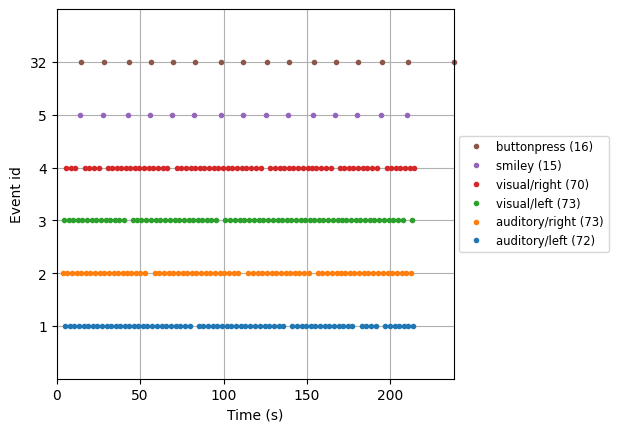

In [22]:
fig=mne.viz.plot_events(events,event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp)

# Epoching continuous data

The **Raw** object and the events array are the bare minimum needed to create an **Epochs** object ,which we create wiht the Epochs class constructor.

##  We also specify some data quality constraints:

1. We'll reject any epoch where peak to peak signal amplitude is beyond resonable limits for that channel type.

Done by rejection dictionary.

In [23]:
reject_criteria=dict(mag=4000e-15,
                     grad=4000e-13,
                     eeg=150e-6,
                     eog=250e-6
                )

By default, **Raw and Epochs** data aren't loaded into memory (they are accessed from disk only when needed),but here we'll force loading into memory using the **preload=True** parameter so that we can see the results of the rejection criteria being applied:

We'll also pass the event dictionary as the **event_id** parameter and specify **tmin and tmax**(the time relative to each event at which to start and end each epoch)

In [25]:
epochs=mne.Epochs(raw,events,event_id=event_dict,tmin=-0.2,tmax=0.5,reject=reject_criteria,preload=True)


Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


In [26]:
type(epochs)

mne.epochs.Epochs

In [27]:
epochs

Number of events,309
Events,auditory/left: 68auditory/right: 70buttonpress: 16smiley: 14visual/left: 73visual/right: 68
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s


Next we'll pool left/right stimulus presentations so we can compare auditory versus visual responses.To avoid baising our signals to the left or right, we'll use **equalize_events_counts** first to randomly sample epochs from each conditions to match the number of epochs present in the condition with the fewest good epochs

In [28]:
conds_we_care_about=['auditory/left','auditory/right','visual/left','visual/right']

epochs.equalize_event_counts(conds_we_care_about)
aud_epochs=epochs['auditory']
vis_epoch=epochs['visual']

del raw,epochs # free up memory


Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


**for avoid biasing we dropped 2 epochs from auditory/right and 5 epochs from visual/left** 

In [29]:
aud_epochs

Number of events,136
Events,auditory/left: 68auditory/right: 68
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s


In [30]:
vis_epoch

Number of events,136
Events,visual/left: 68visual/right: 68
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s


Like **Raw** objects,**Epochs** objects also have a number of built-in plotting methods.One is **plot_image**, which shows each epochs as one row of an image map,with color representing signal magnitude;
 the average evoked response and the sensor location are shown below the image:

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


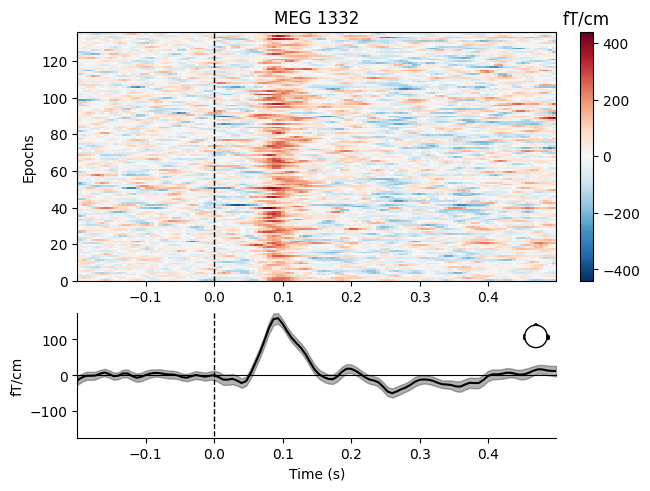

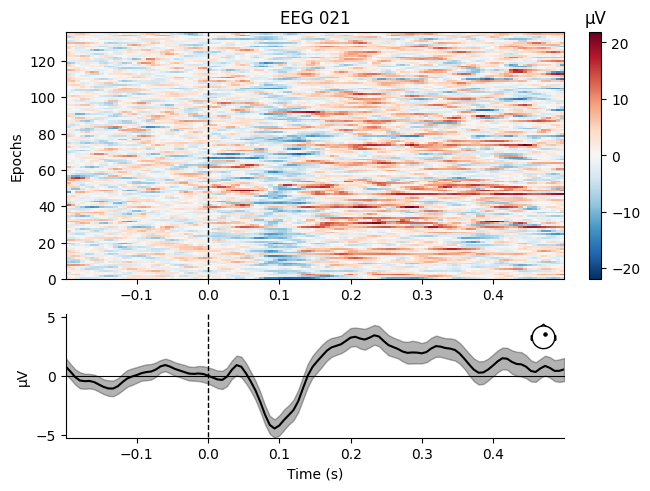

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [34]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])


In [35]:
data=raw.get_data()
data[:6]

array([[-1.62244687e-12, -3.82735681e-12, -7.42095940e-12, ...,
        -1.54065559e-11, -1.31704684e-11, -9.93655636e-12],
       [ 1.88066425e-12,  3.49631541e-12,  2.53839696e-12, ...,
         8.28536836e-12,  1.01157617e-11,  7.81318277e-12],
       [ 2.41390174e-15,  1.71297955e-14,  4.07182140e-14, ...,
        -4.17630201e-14, -5.12135393e-13, -7.30746532e-13],
       [-1.46185594e-12, -5.03283059e-12, -1.06560486e-11, ...,
        -1.91812492e-11, -2.13402424e-11, -2.26041122e-11],
       [-1.01993650e-12, -2.93797723e-12, -1.64063393e-12, ...,
         1.25281499e-11,  1.47809329e-11,  1.18616489e-11],
       [ 1.25898640e-14,  1.37496833e-13,  2.95418433e-13, ...,
         4.06016636e-13, -1.57011130e-13, -4.86355382e-13]])

Both Raw and Epochs objects have get_data methods that return the undrlying data as a Numpy array

Both methods have a picks parameter for subselecting which channel(s) to return.

raw.get_data() has additional parameters for restricting the time domain. The resulting matrices have dimension (n_channels, n_times) for Raw and (n_epochs, n_channels, n_times) for Epochs.

# Time-frequency analysis

the mne.time_frequency submodule provides implementations of several algroithms to compute time-frequency representations,power spectral density and cross-spectral density.

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.5s


No baseline correction applied


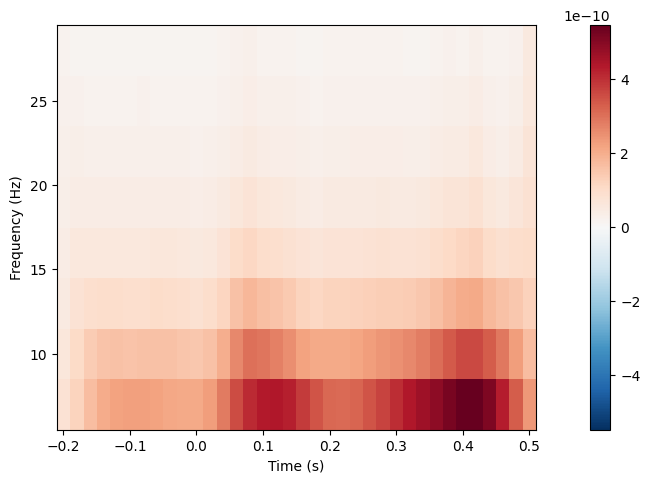

[<Figure size 640x480 with 2 Axes>]

In [36]:
frequencies=np.arange(7,30,3)
power=mne.time_frequency.tfr_morlet(aud_epochs,n_cycles=2,return_itc=False,
                                    freqs=frequencies,decim=3)

power.plot(['EEG 057'])

# Estimating evoked responses

we can get an estimate of evoked responses to auditory versus visual stimuli by averaging together the epochs in each condition. **This is as simple as calling the average method on the Epochs object**, and then using a function from **the mne.viz** module to compare the global field power for each sensor type of the two Evoked objects:

**show_sensor**:- whether to display an inset showing sensor locations on a head outline.

If **None** ,treated as True if there is only one channel in picks.If **True**, location is upper or lower right corner ,depending on data values.

**legends**:- Whether to show a legend of the colors/linestyles of the conditions plotted. 

If **True** ,equivalent to 'upper left'.Defaults to True.

Multiple channel types selected, returning one figure per type.
combining channels using RMS (grad channels)
combining channels using RMS (grad channels)


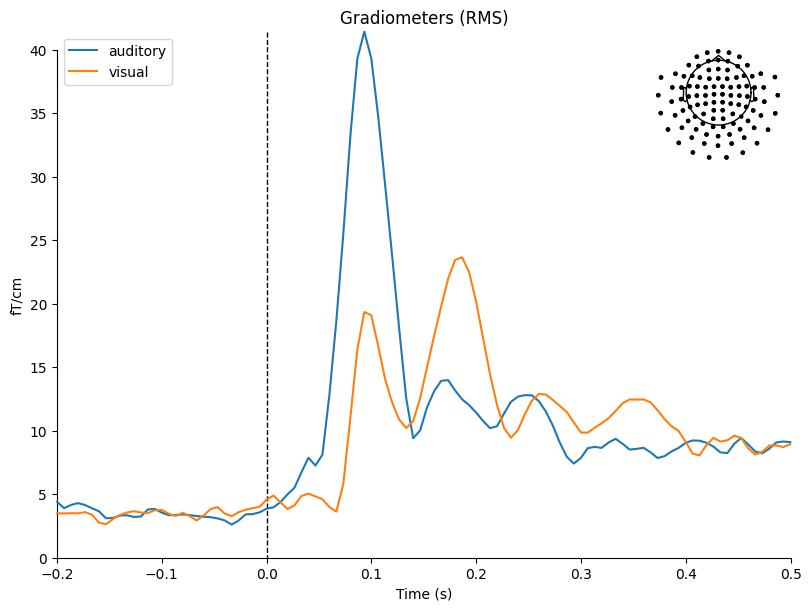

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


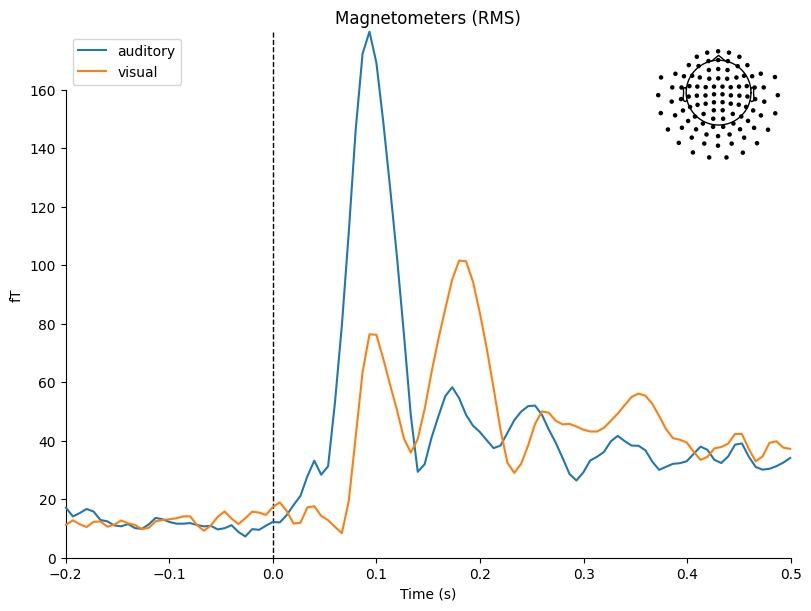

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


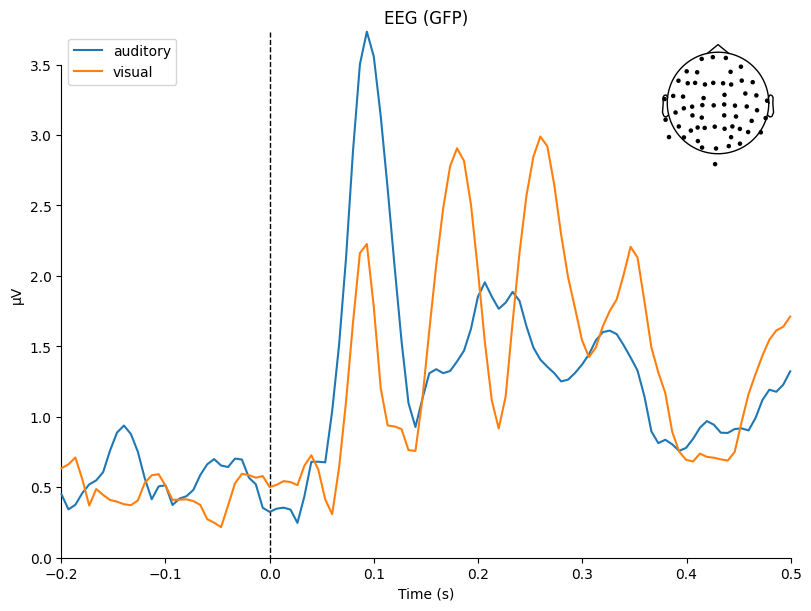

[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]

In [37]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epoch.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                    
                             legend='upper left', show_sensors='upper right')

We can also get a more detailed view of each **Evoked** object using other plotting methods such as **plot_joint or plot_topomap** .

Here , we'll examine just the EEG channels, and see the classic auditory evoked N100-P200 pattern over dorso-frontal electrodes.
then plot scalp topographies at some additional arbitrary times.

Projections have already been applied. Setting proj attribute to True.


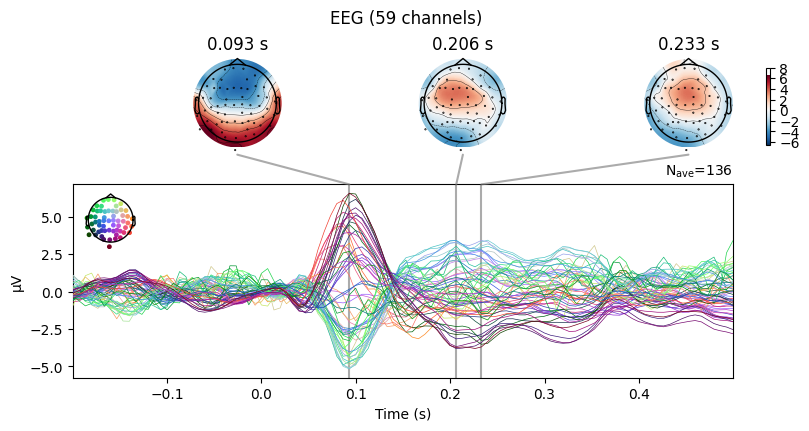

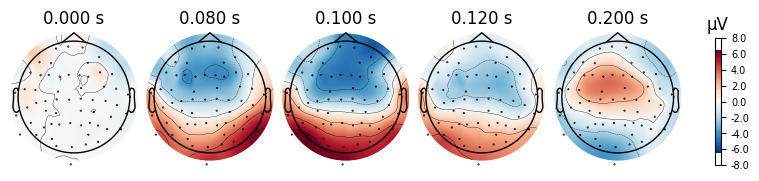

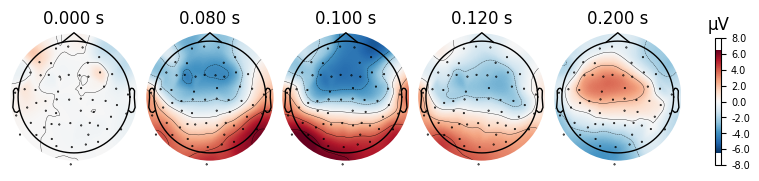

In [38]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Evoked objects can also be combined to show contrasts between conditions, using the **mne.combine_evoked** function. A simple difference can be generated by passing weights =[1,-1].We'll then plot the difference wave at each sensor using **plot_topo**

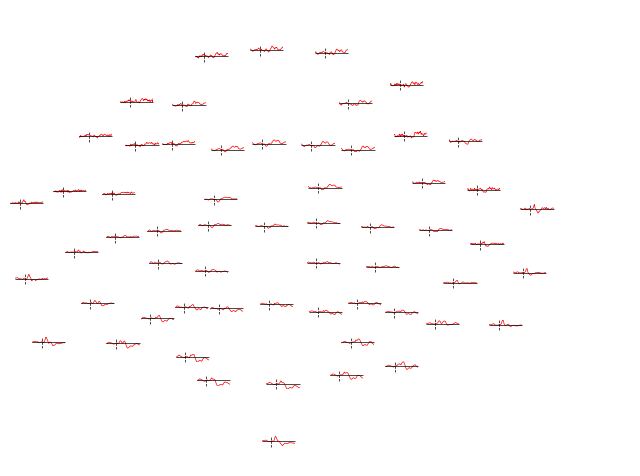

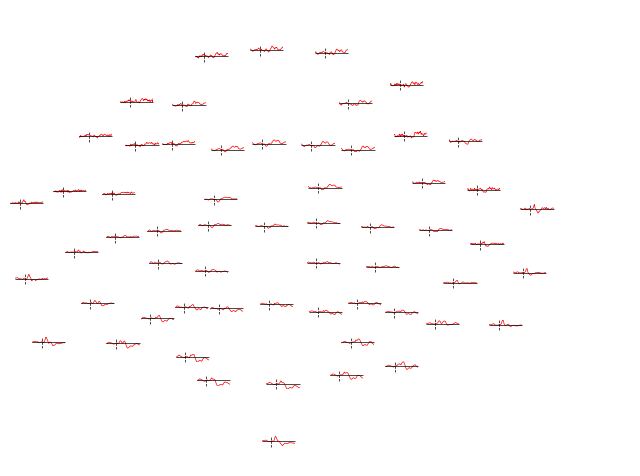

In [39]:
evoked_diff=mne.combine_evoked([aud_evoked,vis_evoked],weights=[1,-1])
evoked_diff.pick(picks='eeg').plot_topo(color='r',legend=False)

In [40]:
evoked_diff.pick(picks='eeg')

Condition,(0.50 × auditory/left + 0.50 × auditory/right) - (0.50 × visual/left + 0.50 × visual/right)
Data kind,average
Timepoints,106 samples
Channels,60 channels
Number of averaged epochs,68.0
Time range (secs),-0.19979521315838786 – 0.49948803289596966
Baseline (secs),-0.200 – 0.000 s


## Inverse Modeling

The evoked activity by projecting the sensor data into this subject's **source space** ( a set of points either on the cortical surface or within the cortical volume of that subject,as estimated by structural MRI scans)

The inverse operator is computed from the forward solution for this subject and an estimate of the covariance of sensor measurements.

Because this “inverse problem” is underdetermined (there is no unique solution), here we further constrain the solution by providing a regularization parameter specifying the relative smoothness of the current estimates in terms of a signal-to-noise ratio (where “noise” here is akin to baseline activity level across all of cortex)

In [41]:
# Load inverse operator
# load inverse operator
inverse_operator_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                     'sample_audvis-meg-oct-6-meg-inv.fif')
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)
# set signal-to-noise ratio (SNR) to compute regularization parameter (λ²)
snr = 3.
lambda2 = 1. / snr ** 2
# generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(vis_evoked, inv_operator,
                                     lambda2=lambda2,
                                     method='MNE')  # or dSPM, sLORETA, eLORETA


Reading inverse operator decomposition from C:\Users\ashish\mne_data\MNE-sample-data\MEG\sample\sample_audvis-meg-oct-6-meg-inv.fif...


    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Read a to

Finally, in order to plot the source estimate on the subject’s cortical surface we’ll also need the path to the sample subject’s structural MRI files (the subjects_dir):

In [42]:
# path to subjects MRI files

subjects_dir=os.path.join(sample_data_folder,'subjects')

# plot 
stc.plot(initial_time=0.1,hemi='split',views=['lat','med'],subjects_dir=subjects_dir)

RuntimeError: Could not load any valid 3D backend
pyvistaqt: No module named 'qtpy'
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

In [43]:
pip install ipywidgets'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "ipywidgets'"


In [44]:
imoport ipywidgets

SyntaxError: invalid syntax (3940284881.py, line 1)

In [47]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [48]:
import ipywidgets

In [50]:
# path to subjects' MRI files
subjects_dir = os.path.join(sample_data_folder, 'subjects')
# plot
stc.plot(initial_time=0.1, hemi='split', views=['lat', 'med'],
         subjects_dir=subjects_dir)

RuntimeError: Could not load any valid 3D backend
pyvistaqt: No module named 'qtpy'
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'